In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
plt.style.use("seaborn-dark-palette")
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [2]:
data = pd.read_csv(r"C:\Users\anuka\OneDrive\Desktop\new_train.csv")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [4]:
data.shape

(32950, 16)

In [5]:
data.isnull

<bound method DataFrame.isnull of        age           job   marital            education  default housing loan  \
0       49   blue-collar   married             basic.9y  unknown      no   no   
1       37  entrepreneur   married    university.degree       no      no   no   
2       78       retired   married             basic.4y       no      no   no   
3       36        admin.   married    university.degree       no     yes   no   
4       59       retired  divorced    university.degree       no      no   no   
...    ...           ...       ...                  ...      ...     ...  ...   
32945   28      services    single          high.school       no     yes   no   
32946   52    technician   married  professional.course       no     yes   no   
32947   54        admin.   married             basic.9y       no      no  yes   
32948   29        admin.   married    university.degree       no      no   no   
32949   35        admin.   married    university.degree       no      no  y

In [6]:
data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [8]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [9]:
data['education'].unique()

array(['basic.9y', 'university.degree', 'basic.4y', 'high.school',
       'professional.course', 'unknown', 'basic.6y', 'illiterate'],
      dtype=object)

In [10]:
data['job'].unique()

array(['blue-collar', 'entrepreneur', 'retired', 'admin.', 'student',
       'services', 'technician', 'self-employed', 'management',
       'unemployed', 'unknown', 'housemaid'], dtype=object)

In [11]:
data_1 = data[data['job'] != 'unemployed']

In [12]:
data_1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [13]:
data_1['job'].unique()

array(['blue-collar', 'entrepreneur', 'retired', 'admin.', 'student',
       'services', 'technician', 'self-employed', 'management', 'unknown',
       'housemaid'], dtype=object)

In [14]:
data_1 = data_1[data_1['job'] != 'student']

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [16]:
import statsmodels
import statsmodels.api as sm

In [17]:
data.describe(include="object").T


,count,unique,top,freq
job,32950,12,admin.,8314
marital,32950,4,married,19953
education,32950,8,university.degree,9736
default,32950,3,no,26007
housing,32950,3,yes,17254
loan,32950,3,no,27131
contact,32950,2,cellular,20908
month,32950,10,may,11011
day_of_week,32950,5,thu,6857
poutcome,32950,3,nonexistent,28416


In [18]:
num_bk=list(data.select_dtypes(include="int64").columns)
num_bk






['age', 'duration', 'campaign', 'pdays', 'previous']

In [19]:
cat_bk=list(data.select_dtypes(exclude="int64").columns)
cat_bk

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [20]:
i=["y"]
num_bk=num_bk+i


In [53]:
i

'precomputed'

In [54]:
["y"]

['y']

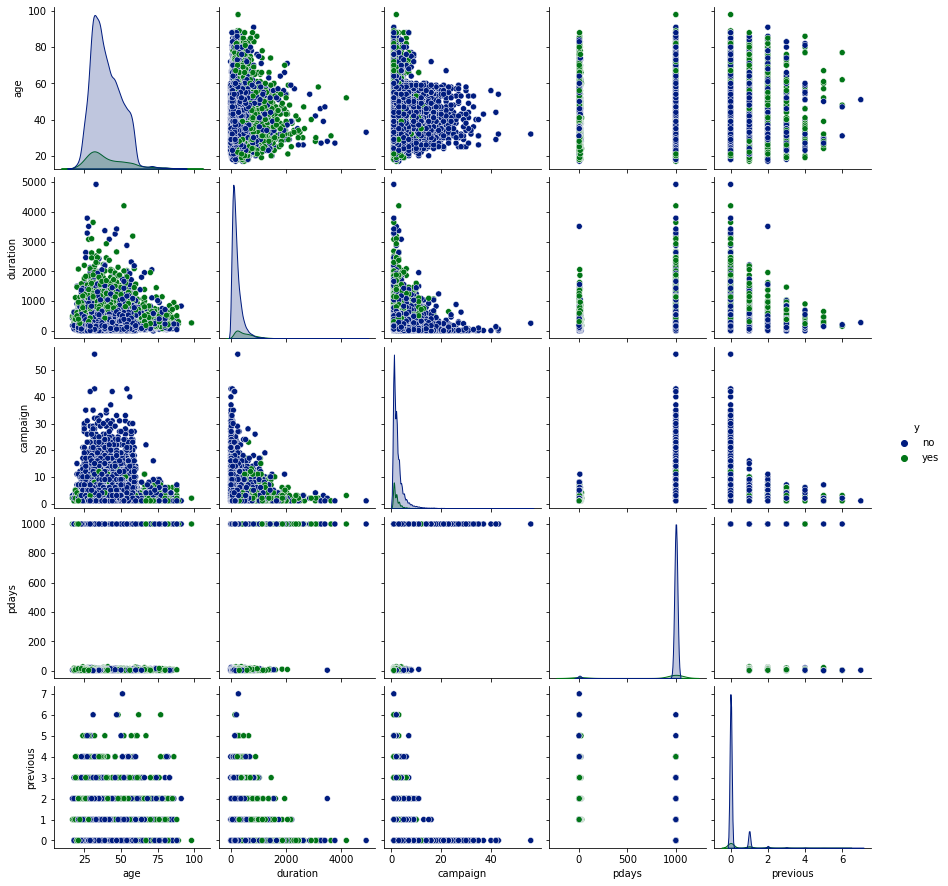

In [21]:
sns.pairplot(data=data[num_bk],hue='y',diag_kind="kde")

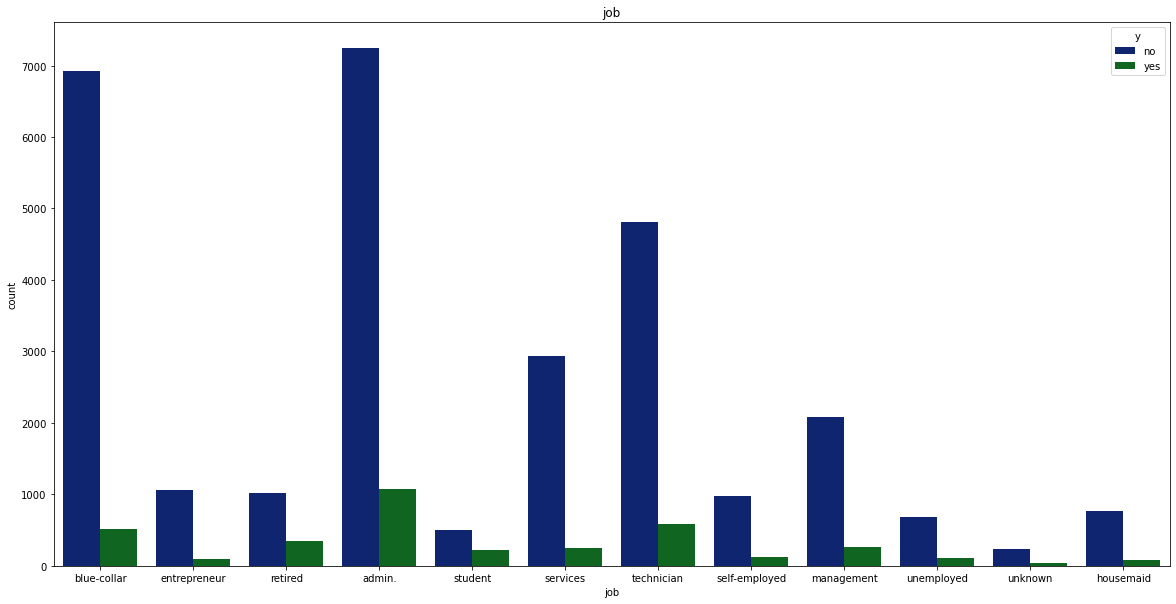

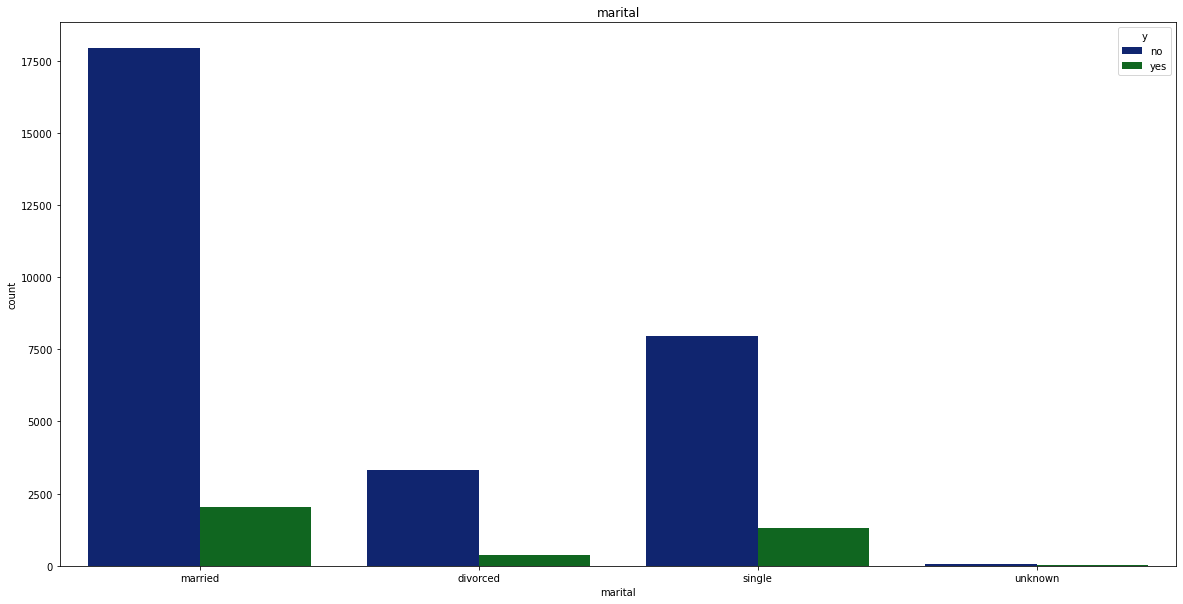

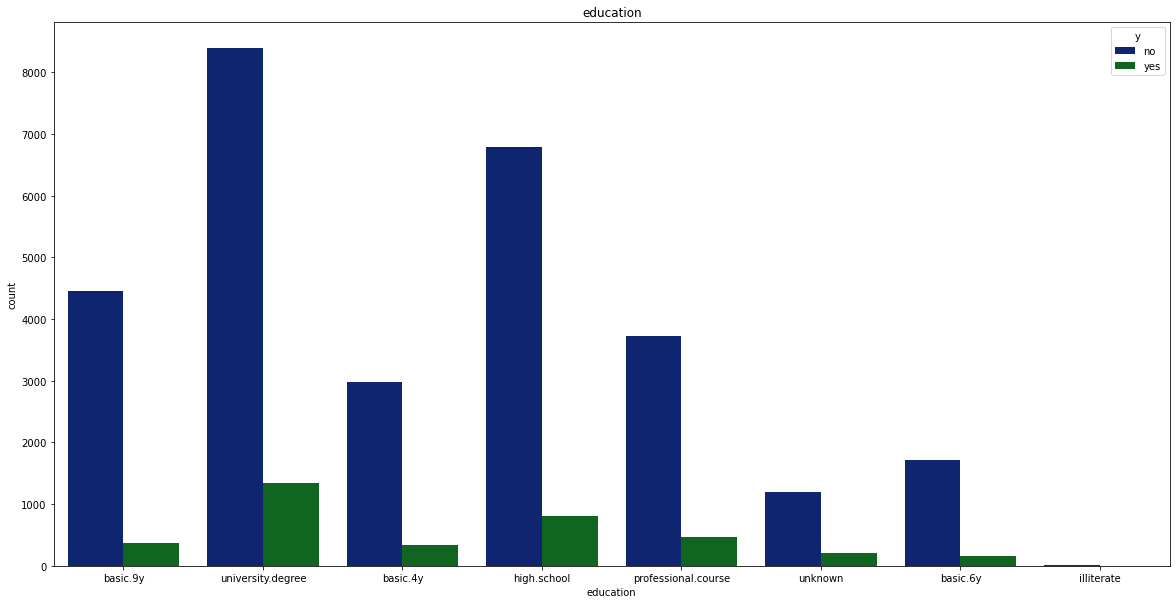

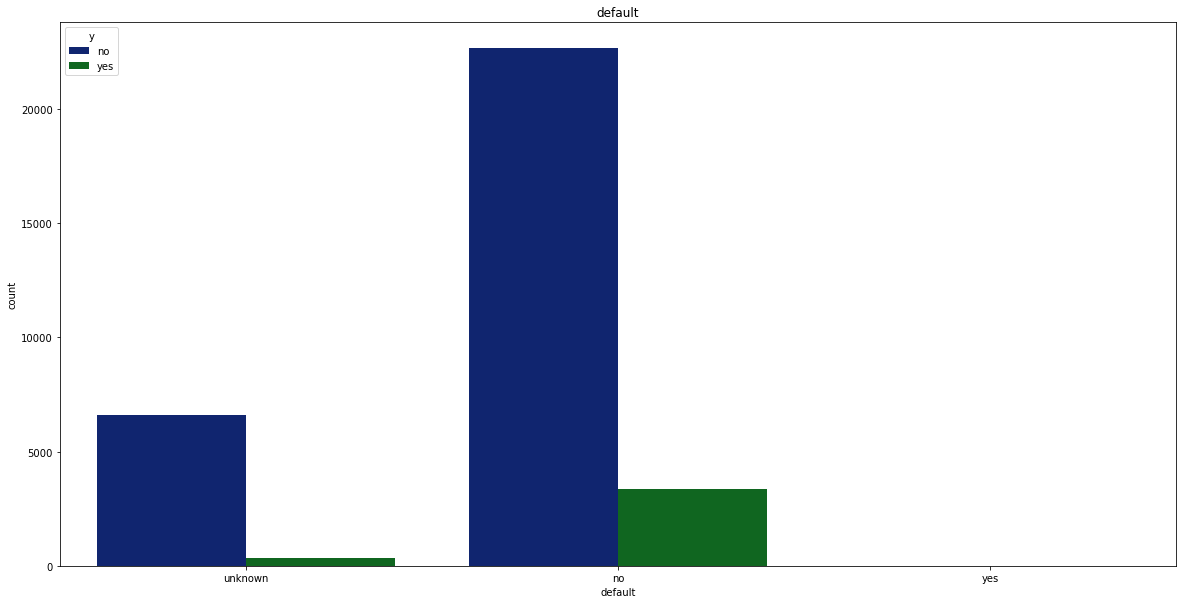

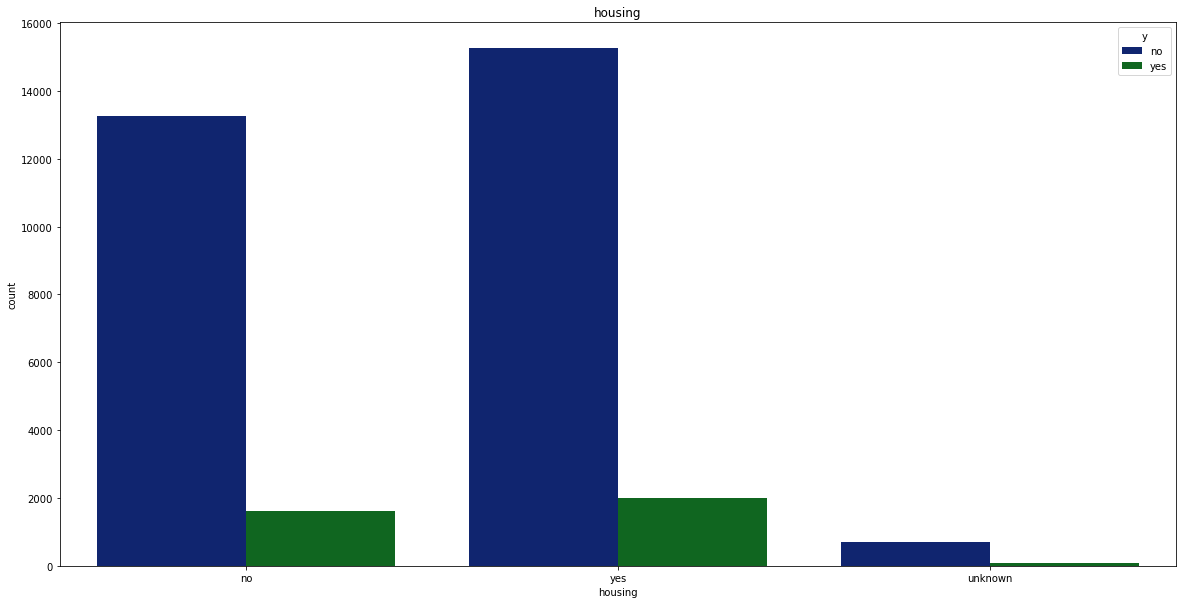

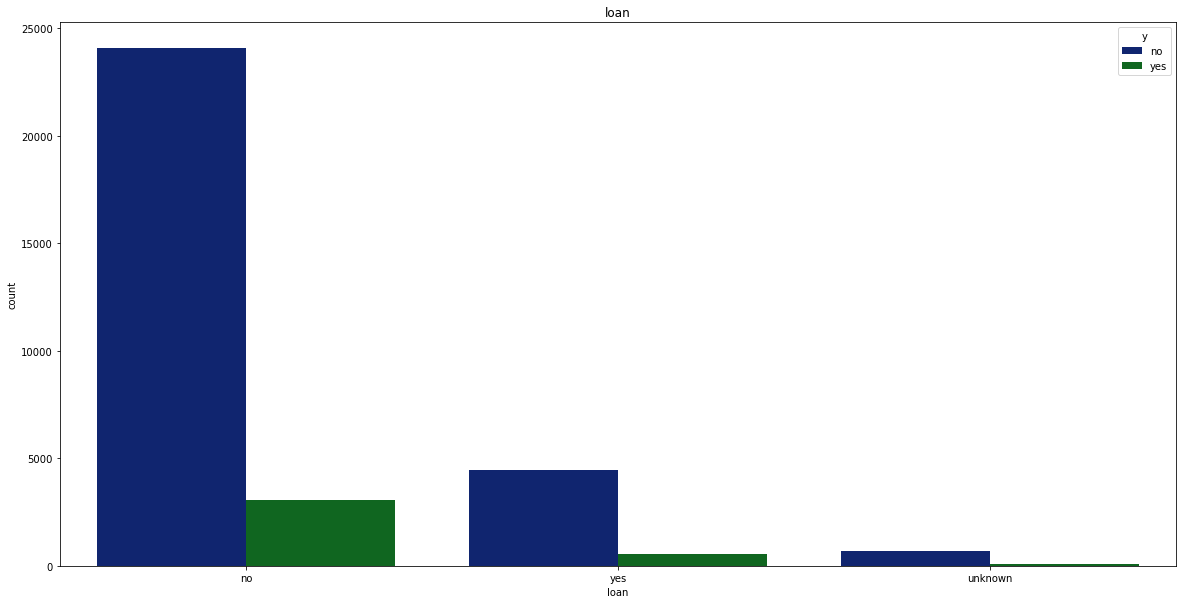

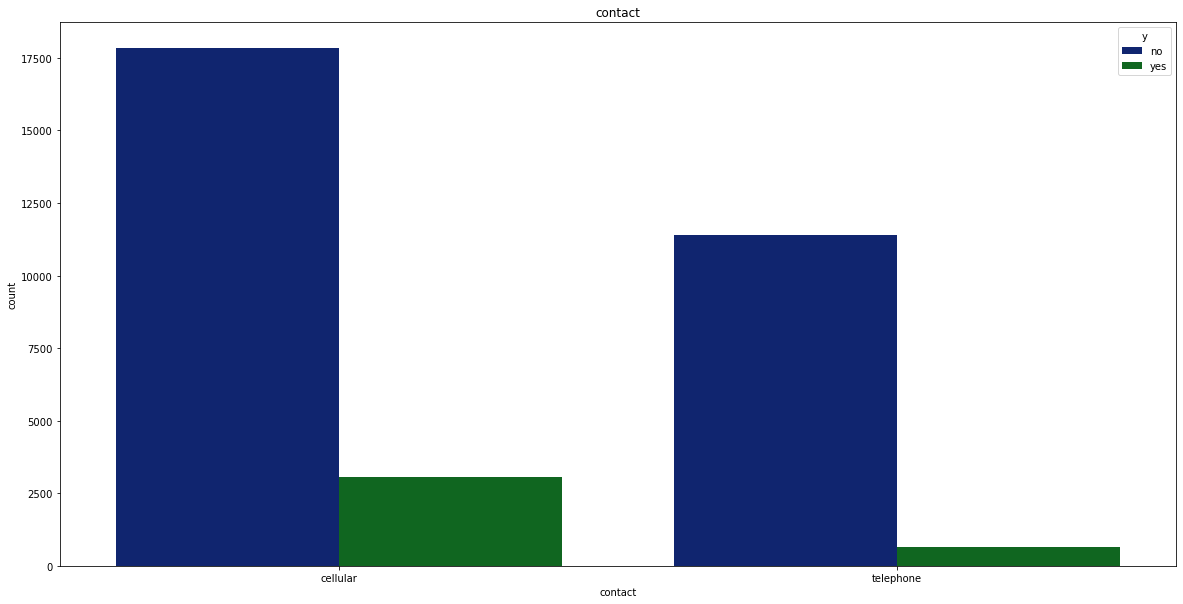

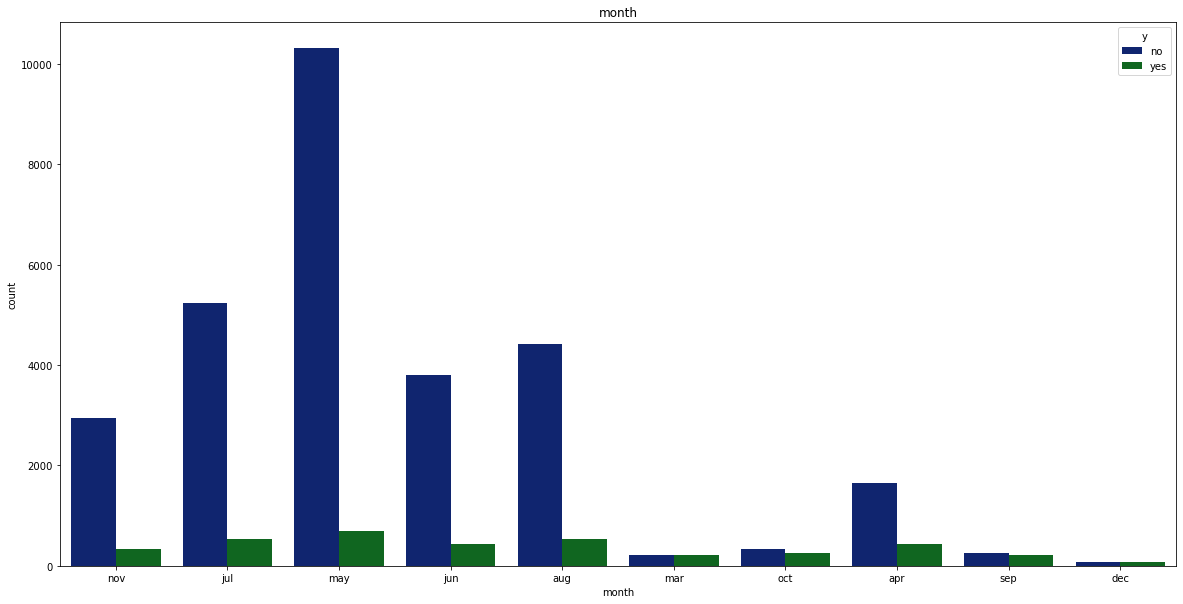

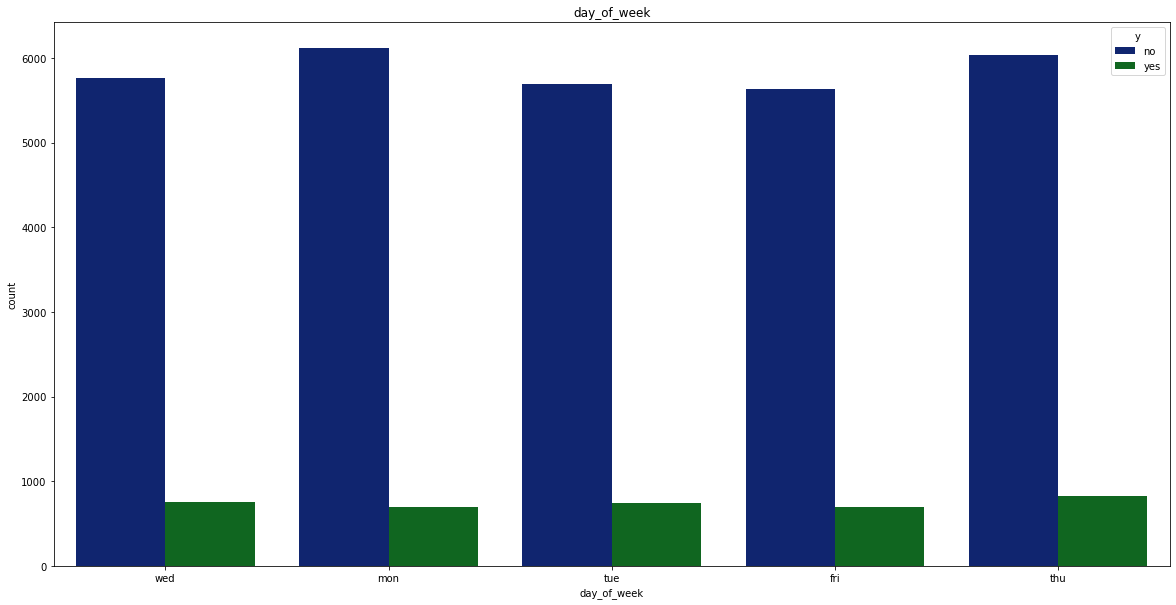

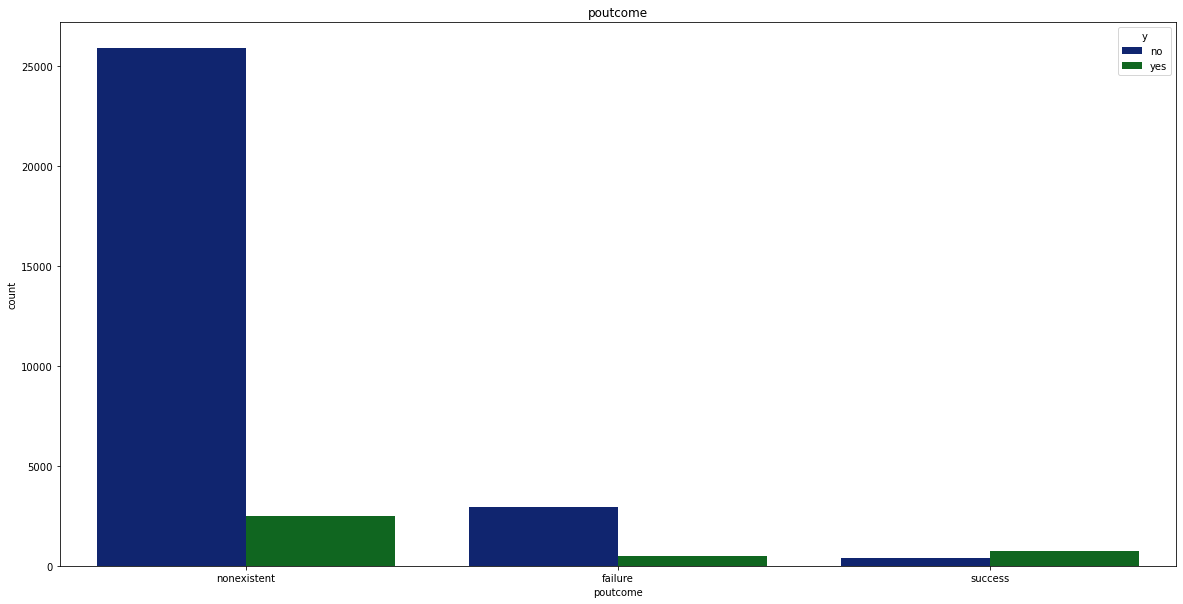

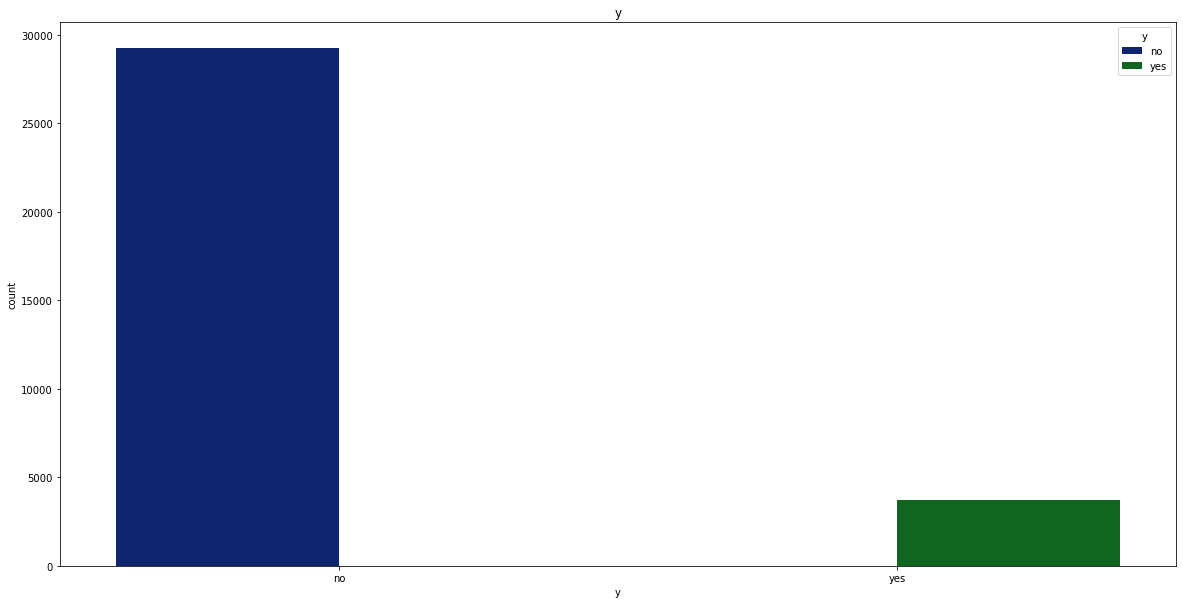

In [22]:
for i in cat_bk:
    plt.figure(figsize=(20,10))
    sns.countplot(x=i, data=data[cat_bk], hue="y")
    plt.title(i)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

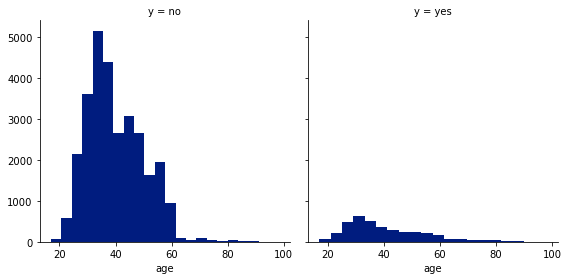

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

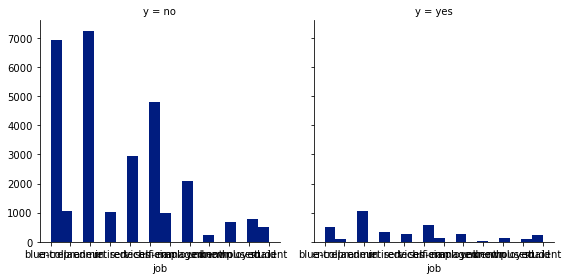

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

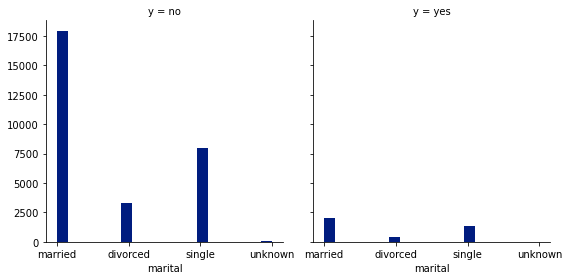

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

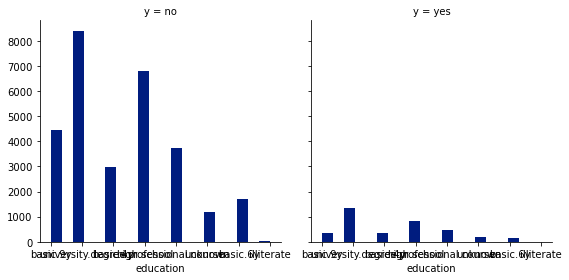

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

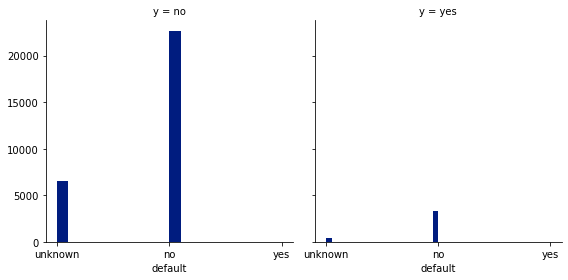

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

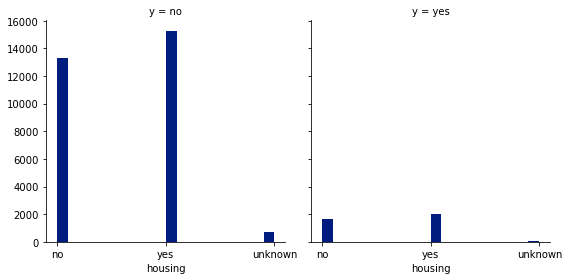

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

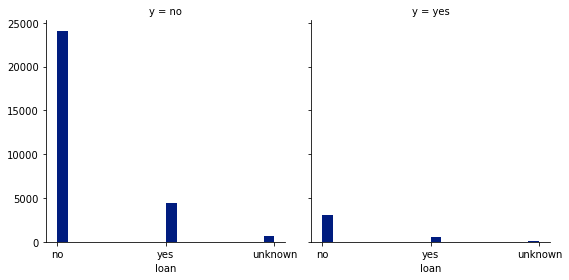

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

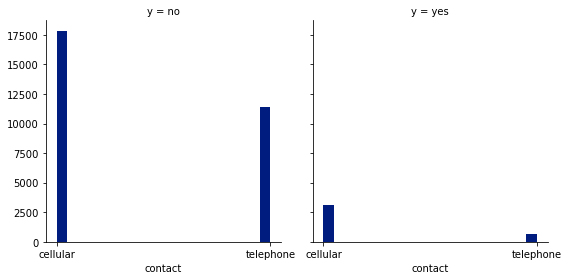

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

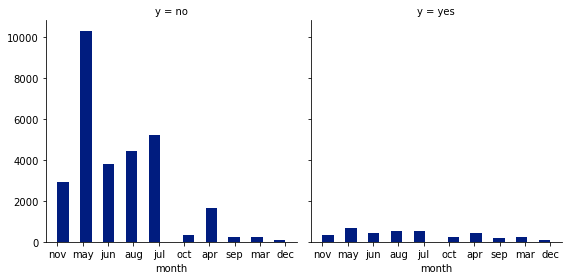

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

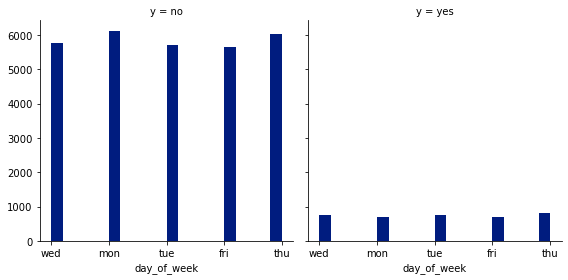

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

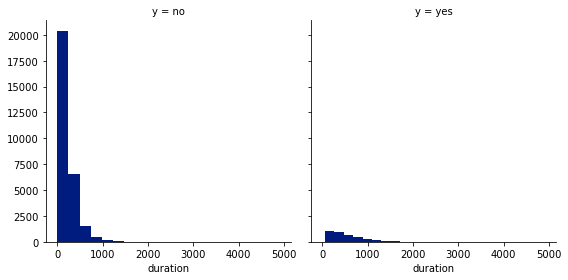

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

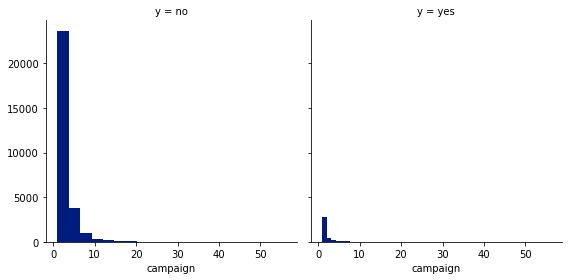

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

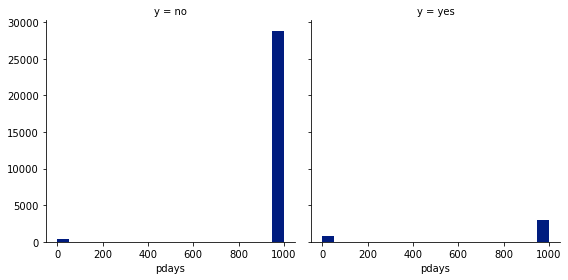

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

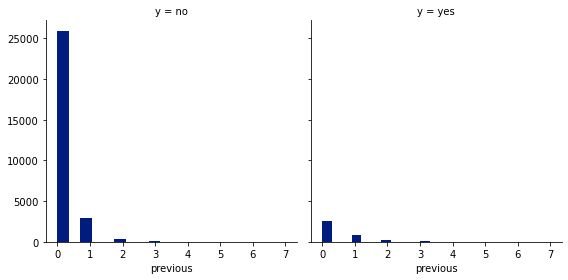

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

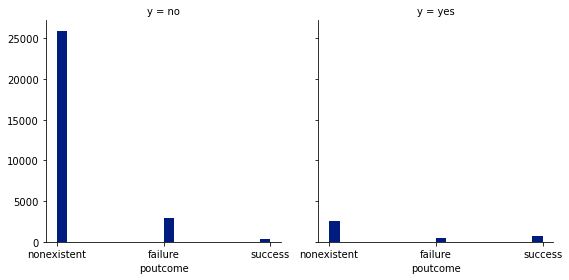

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

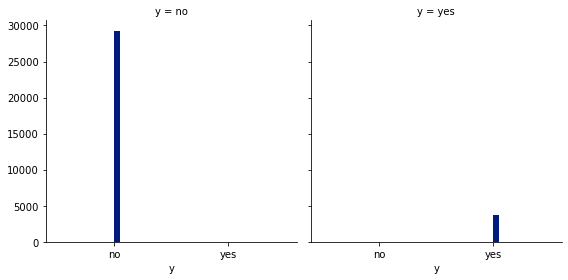

In [23]:
for n in data:
        
        plt.figure(figsize=(20,20))
        g = sns.FacetGrid(data , col='y' , size=4)
        g.map(plt.hist, n , bins=20)
    
    #plt.title(f"{n} vs Survived", size=15)
        plt.show()

In [24]:
bk=data.copy()
bk

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


<Figure size 3600x2880 with 0 Axes>

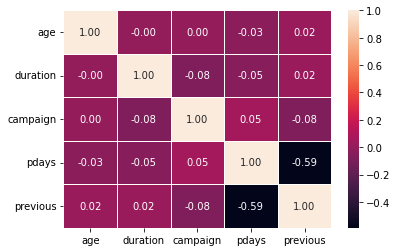

In [25]:
plt.figure(figsize=(50,40))
#sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidths=.7)
plt.show()
sns.heatmap(bk.corr(),annot=True,fmt=".2f",linewidths=.8)
plt.show()

In [26]:
bk4=data.copy()
bk4
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
bk4["y"]=  l.fit_transform( bk4["y"])
bk4
bk4=pd.get_dummies(data=bk,drop_first=True,columns=cat_bk)
bk4

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,49,227,4,999,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,37,202,2,999,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,78,1148,1,999,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,36,120,2,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,999,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
32946,52,64,1,999,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32947,54,131,4,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
32948,29,165,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
X=bk4.drop(["y_yes"],axis=1)
y=bk4[["y_yes"]]
X

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,49,227,4,999,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,37,202,2,999,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,78,1148,1,999,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,36,120,2,999,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
32946,52,64,1,999,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32947,54,131,4,999,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32948,29,165,1,999,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import time

In [30]:
%%time

supervised={"Log":LogisticRegression(),"Rnf":RandomForestClassifier(),"Knn":KNeighborsClassifier(),"Svm":SVC(),"Dec_t":DecisionTreeClassifier()}
unsup={"Stander":StandardScaler(),"MinMax":MinMaxScaler()}
l1=[]
l2=[]
l3=[]

Wall time: 998 µs


In [31]:
def fir_res_mod1():
    
    
    for i,t in unsup.items():
        start = time.time()
        #print(start)

        for n,m in supervised.items():
            
            
            pipe = Pipeline([(i, t), (n, m)])
            print(t,m)
            pipe.fit(X_train, y_train)
            f=pipe.score(X_test, y_test)
            
            l1.append(f)
            l2.append(i+"****"+n)
            end = time.time()
            #print(end)
            v=end-start
            l3.append(v)
            print(f"{i}************{n}",pipe.score(X_test, y_test))
            #print(l3)

    d1={"pipeline":l2,"acc":l1,"timecost":l3}
    global d2
    d2=pd.DataFrame(d1)
    #d2.sort_index(axis=1)

    d2.sort_values(by="acc",inplace=True,ascending=False)
   # d2.sort_index(axis=1)
    d2.reset_index(inplace=True)
    d2.drop("index",axis=1,inplace=True)
    print(d2.columns)

    
    #d2.sort_values(by="timecost",inplace=True,ascending=True)
    
    sns.barplot(y='pipeline',x='acc',data=d2)
    sns.factorplot(x='pipeline',y='acc',data=d2,kind='point',size=4,aspect=5)
  
    return d2 


In [32]:
X

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,49,227,4,999,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,37,202,2,999,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,78,1148,1,999,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,36,120,2,999,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
32946,52,64,1,999,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32947,54,131,4,999,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32948,29,165,1,999,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


StandardScaler() LogisticRegression()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Stander************Log 0.9009104704097117
StandardScaler() RandomForestClassifier()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Stander************Rnf 0.9012139605462822
StandardScaler() KNeighborsClassifier()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Stander************Knn 0.8925644916540213
StandardScaler() SVC()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Stander************Svm 0.8996965098634294
StandardScaler() DecisionTreeClassifier()
Stander************Dec_t 0.87298937784522
MinMaxScaler() LogisticRegression()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MinMax************Log 0.8990895295902883
MinMaxScaler() RandomForestClassifier()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


MinMax************Rnf 0.9016691957511381
MinMaxScaler() KNeighborsClassifier()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


MinMax************Knn 0.8896813353566009
MinMaxScaler() SVC()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MinMax************Svm 0.8922610015174507
MinMaxScaler() DecisionTreeClassifier()
MinMax************Dec_t 0.8710166919575114
Index(['pipeline', 'acc', 'timecost'], dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


,pipeline,acc,timecost
0,MinMax****Rnf,0.901669,6.205616
1,Stander****Rnf,0.901214,6.297397
2,Stander****Log,0.900910,0.296271
3,Stander****Svm,0.899697,62.014415
4,MinMax****Log,0.899090,0.546359
5,Stander****Knn,0.892564,13.132791
6,MinMax****Svm,0.892261,63.249847
7,MinMax****Knn,0.889681,12.773138
8,Stander****Dec_t,0.872989,73.158067
9,MinMax****Dec_t,0.871017,75.159849


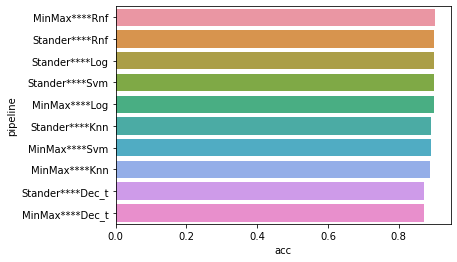

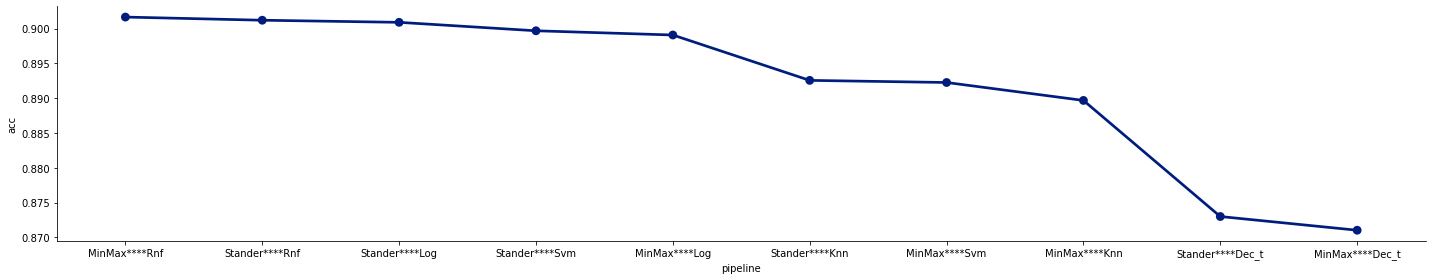

In [33]:
fir_res_mod1()


In [34]:
X

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,49,227,4,999,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,37,202,2,999,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,78,1148,1,999,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,36,120,2,999,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
32946,52,64,1,999,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32947,54,131,4,999,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32948,29,165,1,999,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [35]:
bk4.rename(columns={"y_yes" : "y"},inplace=True)
bk4

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
0,49,227,4,999,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,37,202,2,999,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,78,1148,1,999,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,36,120,2,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,192,1,999,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
32946,52,64,1,999,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32947,54,131,4,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
32948,29,165,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y_yes   32950 non-null  uint8
dtypes: uint8(1)
memory usage: 32.3 KB


In [37]:
y=y.astype('int')


In [38]:
y.value_counts()


y_yes
0        29238
1         3712
dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.decomposition import PCA


In [41]:
pa=PCA(n_components=8)
pa.fit(X)
x=pa.transform(X)



In [42]:
std =StandardScaler()

In [43]:
X=std.fit_transform(X)

In [44]:
X_train

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
26465,30,147,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1387,48,124,1,999,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
22628,37,161,1,999,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
8336,39,202,1,999,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
19898,52,258,3,999,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,60,118,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6265,31,328,4,999,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
11284,29,725,2,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
860,36,15,7,999,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [45]:
X_train.T

,26465,1387,22628,8336,19898,2375,11358,5440,1133,9328,...,2433,769,1685,16023,21962,16850,6265,11284,860,15795
age,30,48,37,39,52,32,36,72,32,24,...,26,46,65,31,41,60,31,29,36,33
duration,147,124,161,202,258,408,148,143,434,410,...,212,184,141,122,136,118,328,725,15,355
campaign,1,1,1,1,3,2,1,1,2,1,...,1,2,2,1,8,1,4,2,7,1
pdays,999,999,999,999,999,999,999,6,999,999,...,999,999,999,999,999,999,999,3,999,999
previous,0,1,0,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
job_blue-collar,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
job_entrepreneur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
job_housemaid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
job_management,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
job_retired,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [46]:
from sklearn.metrics import accuracy_score

In [47]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_prd=rf.predict(X_test)
print(accuracy_score(y_prd,y_test),"****\n",confusion_matrix(y_prd,y_test))


C:\Users\anuka\AppData\Local\Temp/ipykernel_6744/3242895771.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.9024279210925645 ****
 [[5637  482]
 [ 161  310]]


In [48]:
log=LogisticRegression()
log.fit(X_train,y_train)
y_prd=log.predict(X_test)
print(accuracy_score(y_prd,y_test),"****\n",confusion_matrix(y_prd,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8984825493171472 ****
 [[5673  544]
 [ 125  248]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
l = []
maxi = 0
ind = 0
best = 0
best_predict = 0
for i in range (1, 100):
    kcla = RandomForestClassifier(n_estimators = i)
    kcla.fit(X_train, y_train)
    predict = kcla.predict(X_test)
    acu = accuracy_score(predict, y_test)
    l.append(acu)
    if maxi < acu :
        maxi = acu
        ind = i
        best = acu
        best_predict = predict


C:\Users\anuka\AppData\Local\Temp/ipykernel_6744/2312025646.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  kcla.fit(X_train, y_train)
C:\Users\anuka\AppData\Local\Temp/ipykernel_6744/2312025646.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  kcla.fit(X_train, y_train)
C:\Users\anuka\AppData\Local\Temp/ipykernel_6744/2312025646.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  kcla.fit(X_train, y_train)
C:\Users\anuka\AppData\Local\Temp/ipykernel_6744/2312025646.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  kcla.fit(X_train, y_train)


C:\Users\anuka\AppData\Local\Temp/ipykernel_6744/2312025646.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  kcla.fit(X_train, y_train)
C:\Users\anuka\AppData\Local\Temp/ipykernel_6744/2312025646.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  kcla.fit(X_train, y_train)
C:\Users\anuka\AppData\Local\Temp/ipykernel_6744/2312025646.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  kcla.fit(X_train, y_train)
C:\Users\anuka\AppData\Local\Temp/ipykernel_6744/2312025646.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  kcla.fit(X_train, y_train)


C:\Users\anuka\AppData\Local\Temp/ipykernel_6744/2312025646.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  kcla.fit(X_train, y_train)
C:\Users\anuka\AppData\Local\Temp/ipykernel_6744/2312025646.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  kcla.fit(X_train, y_train)
C:\Users\anuka\AppData\Local\Temp/ipykernel_6744/2312025646.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  kcla.fit(X_train, y_train)
C:\Users\anuka\AppData\Local\Temp/ipykernel_6744/2312025646.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  kcla.fit(X_train, y_train)


Accuracy using Log is: 90.47040971168437 %


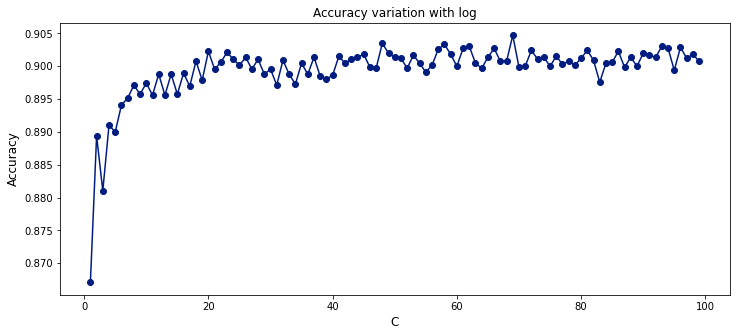

In [50]:
plt.figure(figsize = (12,5))
plt.plot(range (1, 100), l, marker = 'o')
plt.xlabel('C', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy variation with log', size = 12)
print("Accuracy using Log is: {} %".format(maxi*100))

In [51]:
kernal1=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
for i in kernal1:
    
    log=SVC(kernel=i,C=8)
    print(i)
    print(accuracy_score(y_prd,y_test),"****\n",confusion_matrix(y_prd,y_test))
    print("*****")
    

linear
0.8984825493171472 ****
 [[5673  544]
 [ 125  248]]
*****
poly
0.8984825493171472 ****
 [[5673  544]
 [ 125  248]]
*****
rbf
0.8984825493171472 ****
 [[5673  544]
 [ 125  248]]
*****
sigmoid
0.8984825493171472 ****
 [[5673  544]
 [ 125  248]]
*****
precomputed
0.8984825493171472 ****
 [[5673  544]
 [ 125  248]]
*****


Accuracy using Log is: 90.47040971168437 %


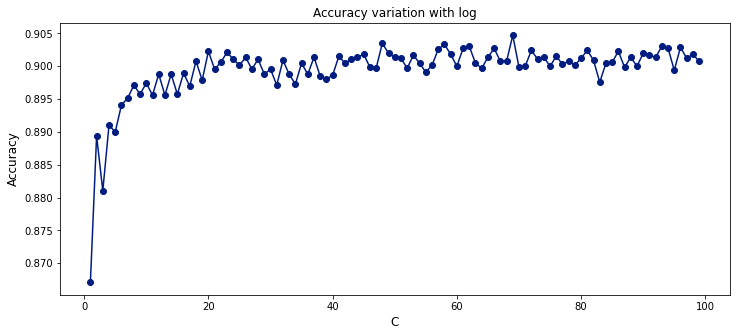

In [52]:
plt.figure(figsize = (12,5))
plt.plot(range (1, 100), l, marker = 'o')
plt.xlabel('C', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy variation with log', size = 12)
print("Accuracy using Log is: {} %".format(maxi*100))

In [55]:
               Predicted Class 0 | Predicted Class 1 | Predicted Class 2


SyntaxError: invalid syntax (Temp/ipykernel_6744/267555540.py, line 1)